In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/apd2599/Training_2021_CIRCUIT/main/Cardio/cardio_train.csv', sep=';', index_col='id')

In [22]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
target = df['cardio']
df = df.drop('cardio', axis=1)
target

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 70000, dtype: int64

In [24]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [26]:
def Log_Reg(X=X_train, y=y_train, X2=X_test, y2=y_test):
    clf = LogisticRegression().fit(X, y)
    print(clf.predict(X2))
    
    print(clf.score(X, y))
    print(classification_report(y2, clf.predict(X2)))

    #plt.figure(1, figsize=(4,3))
    #plt.clf()
    #plt.scatter(X, y, color='black', zorder=20)
    #loss = expit(X2 * clf.coef_ + clf.intercept_).ravel()
    #plt.plot(X2, loss, color='red', linewidth=3)

    logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [31]:
def Random(df=df, target=target, X=X_train, y=y_train, X2=X_test, y2=y_test):
  clf = RandomForestClassifier(max_depth=2, random_state=0)
  clf.fit(X, y)

  print(clf.predict(X2))
    
  print(clf.score(X, y))
  print(classification_report(y2, clf.predict(X2)))


  plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
  plt.rcParams.update({'font.size': 14})
  sorted_idx = clf.feature_importances_.argsort()
  plt.barh(df.columns[sorted_idx], clf.feature_importances_[sorted_idx])
  plt.xlabel("Random Forest Feature Importance")

[1 1 1 ... 0 1 0]
0.7136886993603412
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     11506
           1       0.76      0.64      0.70     11594

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100



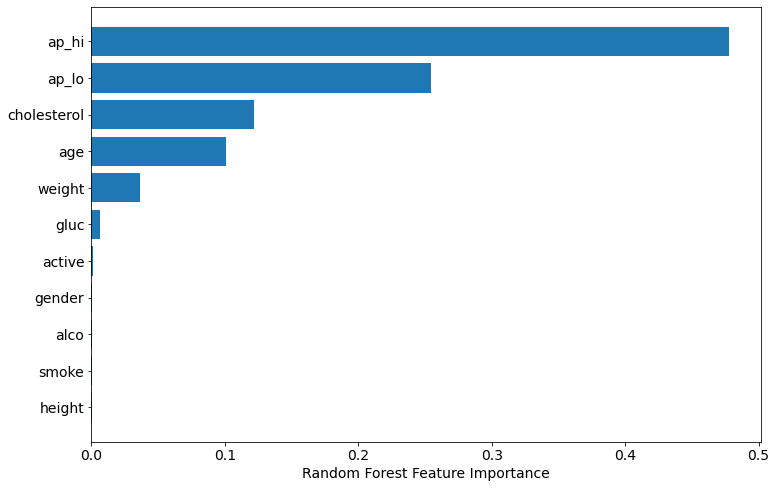

In [32]:
Random(df, target, X_train, y_train, X_test, y_test)